In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *
from Bio import Seq
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.SeqFeature import FeatureLocation, CompoundLocation
import networkx as nx

In [3]:
sys.path.append("../..")
from utils import *

In [4]:
path = Path('F:/genome/bacterial genomes/')

In [5]:
df = pd.read_csv(path/'bacterial_data.csv')

In [6]:
df.head()

,Sequence,is_train
0,AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATT...,1
1,GGTTTCACCGCCGGTAATGAAAAAGGCGAACTGGTGGTGCTTGGAC...,1
2,AGCTGGCTGAAGAATAAACATATCGACTTACGTGTCTGCGGTGTTG...,1
3,CCGTTGGTACTGCGCGGATATGGTGCGGGCAATGACGTTACAGCTG...,1
4,CGCTCTGTGTGACAAGCCGGAAACCGCCCAGCGCGTTGCCGACTGG...,1


In [7]:
# 10% of the data used for validation
train_df, valid_df = split_data(df, 0.9)

In [8]:
tok = Tokenizer(GenomicTokenizer, n_cpus=1, pre_rules=[], post_rules=[], special_cases=['xxpad'])

In [9]:
data = GenomicTextLMDataBunch.from_df(path, train_df, valid_df, bs=428, tokenizer=tok, text_cols=0, label_cols=1)

In [10]:
# Model vocabulary - 1025 tokens. 1024 5-mer nucleotide combinations plus one padding token
len(data.vocab.itos)

1025

In [11]:
# Save model vocabulary - this will be important later
np.save(path/'vocab.npy', data.vocab.itos)

In [14]:
config = dict(emb_sz=400, n_hid=1150, n_layers=3, pad_token=0, qrnn=False, output_p=0.25, 
                          hidden_p=0.1, input_p=0.2, embed_p=0.02, weight_p=0.15, tie_weights=True, out_bias=True)
drop_mult = 0.3

In [15]:
learn = get_model_LM(data, drop_mult, config)

In [ ]:
learn.model

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.25E-03


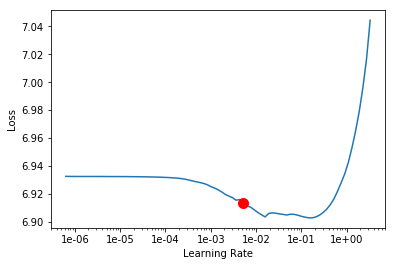

In [24]:
learn.lr_find()
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.608056,2.580345,0.156807
2,2.584269,2.558019,0.163180
3,2.568764,2.540910,0.168900
4,2.548662,2.523559,0.174355
5,2.538033,2.516792,0.176542


In [27]:
learn.fit_one_cycle(5, 5e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.550786,2.523497,0.174533
2,2.551540,2.522285,0.175103
3,2.538035,2.512306,0.178443
4,2.526114,2.500360,0.182585
5,2.520942,2.496032,0.183943


In [29]:
learn.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.520893,2.496587,0.183863
2,2.522150,2.495154,0.184430
3,2.516211,2.492130,0.185569
4,2.510992,2.489000,0.186598
5,2.511100,2.488182,0.186869


In [31]:
learn.fit_one_cycle(5, 1e-4, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.506040,2.488191,0.186899
2,2.505819,2.487769,0.187014
3,2.509614,2.487398,0.187189
4,2.504046,2.487159,0.187234
5,2.505729,2.487089,0.187264


In [32]:
learn.save('bacterial');

In [ ]:
learn.save_encoder('bacterial_enc');